# K-Means
In this notebook we generate anchor boxes using k-means on the dataset. All the bounding boxes' w and h must be loaded in the numpy array. We use script generated CSV files which has fields w and h.

K-means used in this notebook is based on idea of using mini batches of dataset. We also plot k vs avgIOU to show that avgIOU increases if we increase number of anchor boxes used in the model. 


## Algorithm for K-means 

<img src="notebook_images/kmeans.png" width="500px"></img>

We used distance function as mentioned in YoloV2

distance(centroid,box) = 1 - IoU(centroid, box)

In [1]:
from config import Configuration
import pandas as pd
import numpy as np
from util import cvt_coord_to_diagonal, intersection_over_union, cvt_coord_to_mid_point
import matplotlib.pyplot as plt
from k_means import KMeans
from mini_batch_kmeans import MiniBatchKMeans
from matplotlib import rc
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
rc('font', **font)

In [2]:
leaf_train_data = pd.read_csv('annotation_data/train_leaf_data_v2.csv')
leaf_train_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.579291,0.002809,0.850047,0.466643,0.714669,0.234726,0.270756,0.463834
1,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.208256,0.718048,0.333022,1.000000,0.270639,0.859024,0.124767,0.281952
2,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.163013,0.046348,0.268424,0.314607,0.215718,0.180478,0.105410,0.268258
3,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.127799,0.583919,0.230877,0.795646,0.179338,0.689782,0.103078,0.211728
4,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.334188,0.548806,0.460588,0.660463,0.397388,0.604635,0.126399,0.111657
5,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.458489,0.468750,0.521455,0.639045,0.489972,0.553897,0.062966,0.170295
6,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.295243,0.152739,0.401819,0.294593,0.348531,0.223666,0.106576,0.141854
7,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.488806,0.204003,0.614039,0.321980,0.551423,0.262992,0.125233,0.117978
8,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.895289,0.145365,0.988573,0.614817,0.941931,0.380091,0.093284,0.469452
9,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.000233,0.805478,0.099580,0.936096,0.049907,0.870787,0.099347,0.130618


In [3]:
k_vs_iou_data = []

Data has been fitted
 AvgError: 0.40051846638479394, AvgIou: 0.5994815336152061


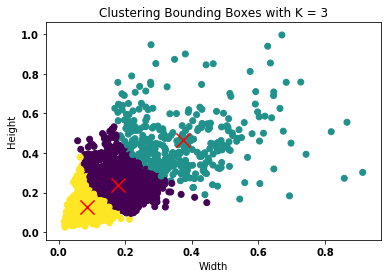

In [6]:
K = 3
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [7]:
k_means.cluster_vectors

array([[0.17886146, 0.23671875],
       [0.37398115, 0.46396339],
       [0.08477888, 0.1265439 ]])

Data has been fitted
 AvgError: 0.3380524974217247, AvgIou: 0.6619475025782752


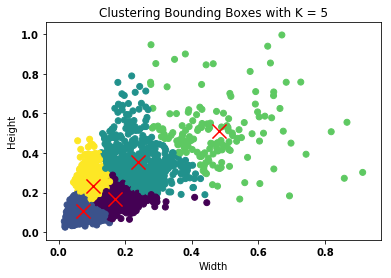

In [8]:
K = 5
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [9]:
k_means.cluster_vectors

array([[0.17093618, 0.16538544],
       [0.07452498, 0.10719703],
       [0.2390553 , 0.35490664],
       [0.482717  , 0.51051364],
       [0.10216386, 0.23157324]])

Iteration 1, AvgError: 0.6769134597060545, AvgIou: 0.3230865402939454
Iteration 2, AvgError: 0.47135707909145325, AvgIou: 0.5286429209085466
Iteration 3, AvgError: 0.4203600778485283, AvgIou: 0.5796399221514718
Iteration 4, AvgError: 0.409698782390517, AvgIou: 0.5903012176094831
Iteration 5, AvgError: 0.38153229785755044, AvgIou: 0.6184677021424496
Iteration 6, AvgError: 0.37452723142550787, AvgIou: 0.6254727685744922
Iteration 7, AvgError: 0.3703291014147102, AvgIou: 0.6296708985852898
Iteration 8, AvgError: 0.3619638907717298, AvgIou: 0.6380361092282703
Iteration 9, AvgError: 0.3487408443024441, AvgIou: 0.6512591556975559
Iteration 10, AvgError: 0.3443257055997385, AvgIou: 0.6556742944002615
Iteration 11, AvgError: 0.33854332642875967, AvgIou: 0.6614566735712404
Iteration 12, AvgError: 0.3320222309388376, AvgIou: 0.6679777690611625
Iteration 13, AvgError: 0.3317893840815344, AvgIou: 0.6682106159184654
Iteration 14, AvgError: 0.328364249781404, AvgIou: 0.6716357502185959
Iteration 15,

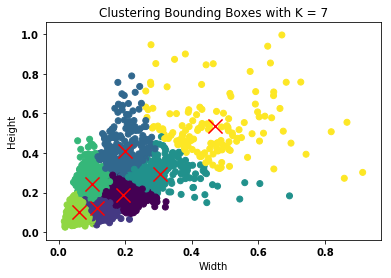

In [10]:
K = 7
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=True)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [11]:
k_means.cluster_vectors

array([[0.19279534, 0.1880403 ],
       [0.11642685, 0.1241727 ],
       [0.19926012, 0.41221693],
       [0.30399853, 0.29163776],
       [0.10139122, 0.24294109],
       [0.06281316, 0.10330993],
       [0.4690755 , 0.53755318]])

Data has been fitted
 AvgError: 0.27814830744116625, AvgIou: 0.7218516925588339


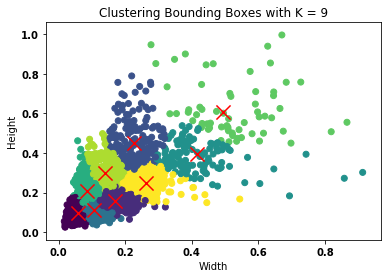

In [15]:
K = 9
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.2573175137472915, AvgIou: 0.7426824862527084


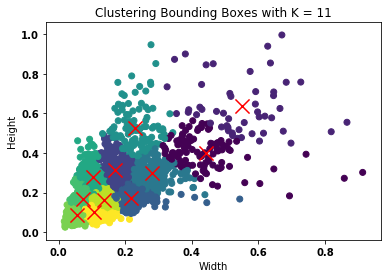

In [16]:
K = 11
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.23811186707374665, AvgIou: 0.7618881329262533


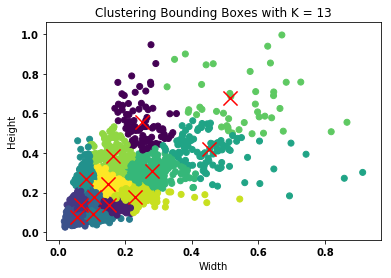

In [18]:
K = 13
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

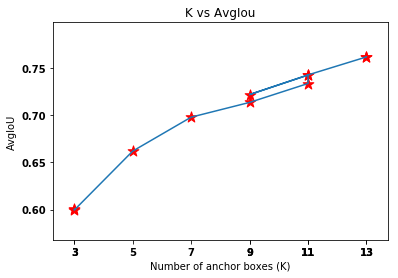

In [19]:
k_vs_iou_data = np.array(k_vs_iou_data)
plt.xlabel('Number of anchor boxes (K)')
plt.ylabel('AvgIoU')
plt.xticks(ticks=k_vs_iou_data[:,0])
plt.title('K vs AvgIou')
plt.scatter(k_vs_iou_data[:,0],k_vs_iou_data[:,1],c='r',marker='*',s=128)
plt.plot(k_vs_iou_data[:,0],k_vs_iou_data[:,1])

In [20]:
k_vs_iou_data

array([[3.        , 0.59998434],
       [5.        , 0.65950357],
       [7.        , 0.69934541]])